In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# path = r'..\..\data'
path = r'C:\work\dev\dECMT_src\data_all\COVID19_Data'


demographics_df = pd.read_csv(path + '\REACT_COVID_Demographics_20200506.csv')
events_df = pd.read_csv(path + '\REACT_Events.csv')
lab_results_df = pd.read_csv(path + '\REACT_LabResults.csv')
pharmacy_data_df = pd.read_csv(path + '\REACT_PharmacyData.csv')
covid_test_df= pd.read_csv(path + '\REACT_UHSCOVIDTest_processed.csv')
vitalsigns_cat_df = pd.read_csv(path + '\REACT_Vitalsigns_Categorical.csv')
vitalsigns_num_df = pd.read_csv(path + '\REACT_Vitalsigns_Numeric.csv')

# How many unique patients do we have?

In [3]:
print('REACT_COVID_Demographics_20200506 unique study_id: ', demographics_df['STUDY_ID'].unique().shape[0])
print('REACT_Events unique study_id: ', events_df['STUDY_ID'].unique().shape[0])
print('REACT_LabResults unique study_id: ', lab_results_df['STUDY_ID'].unique().shape[0])
print('REACT_PharmacyData unique study_id: ', pharmacy_data_df['STUDY_ID'].unique().shape[0])
print('REACT_UHSCOVIDTest_processed unique study_id: ', covid_test_df['STUDY_ID'].unique().shape[0])
print('REACT_Vitalsigns_Categorical unique study_id: ', vitalsigns_cat_df['STUDY_ID'].unique().shape[0])
print('REACT_Vitalsigns_Numeric unique study_id: ', vitalsigns_num_df['STUDY_ID'].unique().shape[0])

REACT_COVID_Demographics_20200506 unique study_id:  391
REACT_Events unique study_id:  564
REACT_LabResults unique study_id:  482
REACT_PharmacyData unique study_id:  510
REACT_UHSCOVIDTest_processed unique study_id:  564
REACT_Vitalsigns_Categorical unique study_id:  516
REACT_Vitalsigns_Numeric unique study_id:  538


We have all parameters for:

In [4]:
len(set.intersection(set(demographics_df['STUDY_ID'].unique()),
                 set(events_df['STUDY_ID'].unique()),
                set(lab_results_df['STUDY_ID'].unique()),
                 set(pharmacy_data_df['STUDY_ID'].unique()),
                set(covid_test_df['STUDY_ID'].unique()),
                 set(vitalsigns_cat_df['STUDY_ID'].unique()),
                set(vitalsigns_num_df['STUDY_ID'].unique())))

294

patients.

# Create dictionary

In [5]:
demographics_df.head()

,STUDY_ID,PATIENT_AGE,GENDER,ETHNIC_GROUP,POSTCODE,IS_PREGNANT,FIRST_POS_DATE,FIRST_POS_DATETIME,FIRST_POS_TIME,ADM_DATE,ADM_DATETIME,ADM_TIME,DISCHARGE_DATE,LOS,LOS_PREPOS
0,UHSCOVID_9ecc7ad0,67,F,A,SO50,0,27/04/2020,27/04/2020 00:00,00:00:00,26/04/2020,26/04/2020 21:00,21:00:00,NaN,8.70,NaN
1,UHSCOVID_3952cfb9,65,F,A,SO17,0,22/04/2020,22/04/2020 00:00,00:00:00,22/04/2020,22/04/2020 20:20,20:20:00,NaN,12.72,NaN
2,UHSCOVID_058c23fb,81,M,A,SO51,0,27/04/2020,27/04/2020 00:00,00:00:00,27/04/2020,27/04/2020 16:54,16:54:00,NaN,7.87,NaN
3,UHSCOVID_a9554b0d,70,M,A,SO31,0,29/04/2020,29/04/2020 00:00,00:00:00,29/04/2020,29/04/2020 19:32,19:32:00,NaN,5.76,NaN
4,UHSCOVID_38fe19fd,75,M,A,SO16,0,10/04/2020,10/04/2020 00:00,00:00:00,09/04/2020,09/04/2020 17:46,17:46:00,NaN,25.83,0.18


## Datetime formating

Make sure that each date time value is in proper format

In [6]:
def convert_columns_to_datetime(df, columns, datetime_format):
    for column in columns:
        df[column] = pd.to_datetime(df[column] , format=datetime_format)

    return df

In [7]:
demographics_df = convert_columns_to_datetime(demographics_df, columns = ['FIRST_POS_DATETIME','ADM_DATETIME','DISCHARGE_DATE'], datetime_format='%d/%m/%Y %H:%M')
demographics_df = convert_columns_to_datetime(demographics_df, columns = ['FIRST_POS_DATE', 'ADM_DATE'], datetime_format='%d/%m/%Y')

In [8]:
events_df = convert_columns_to_datetime(events_df, columns = ['START_DATETIME','END_DATETIME'], datetime_format='%Y-%m-%d %H:%M:%S')
events_df = convert_columns_to_datetime(events_df, columns = ['START_DATE', 'END_DATE'], datetime_format='%d/%m/%Y')

In [9]:
lab_results_df = convert_columns_to_datetime(lab_results_df, columns = ['PATHOLOGY_SPECIMEN_DATE'], datetime_format='%Y-%m-%d %H:%M:%S')
lab_results_df = convert_columns_to_datetime(lab_results_df, columns = ['SPECIMEN_DATE'], datetime_format='%d/%m/%Y')

In [10]:
pharmacy_data_df = convert_columns_to_datetime(pharmacy_data_df, columns = ['DRUGSTARTDATE','DRUGENDDATE'], datetime_format='%Y-%m-%d %H:%M:%S')
pharmacy_data_df = convert_columns_to_datetime(pharmacy_data_df, columns = ['DRUG_STARTDATE', 'DRUG_ENDDATE'], datetime_format='%d/%m/%Y')

In [11]:
covid_test_df = convert_columns_to_datetime(covid_test_df, columns = ['TAKEN_DATE','REPORT_DATE', 'REQUEST_DATE','ADMIT_DATETIME', 'DISCHARGEDATE'], datetime_format='%Y-%m-%d %H:%M:%S')

In [12]:
vitalsigns_cat_df = convert_columns_to_datetime(vitalsigns_cat_df, columns = ['UNITFROM_DATETIME','UNITTO_DATETIME','RECORDED_DATETIME','VALIDATION_DATETIME'], datetime_format='%Y-%m-%d %H:%M:%S')
vitalsigns_cat_df = convert_columns_to_datetime(vitalsigns_cat_df, columns = ['RECORDED_DATE'], datetime_format='%d/%m/%Y')

In [13]:
vitalsigns_num_df = convert_columns_to_datetime(vitalsigns_num_df, columns = ['UNITFROM_DATETIME','UNITTO_DATETIME','RECORDED_DATETIME','VALIDATION_DATETIME'], datetime_format='%Y-%m-%d %H:%M:%S')
vitalsigns_num_df = convert_columns_to_datetime(vitalsigns_num_df, columns = ['RECORDED_DATE'], datetime_format='%d/%m/%Y')

___

In [14]:
def assign_demographics(dict_, demographics_df, STUDY_ID):
    
    # dict_ - a dictionary corresponding to a single patient
    # demodemographics_df - a dataframe with demographics info directly from the csv file (datetime formating needed first)
    # STUDY_ID - patient id
    
    ## Function assignes relevent demographics information to one patient.
    ## It appends each feature name as a new 'dictinary key', and its value as 'dictionary value'.
    
    dict_['GENDER'] = demographics_df.loc[demographics_df['STUDY_ID'] == STUDY_ID, 'GENDER'].values[0]
    dict_['ETHNIC_GROUP'] = demographics_df.loc[demographics_df['STUDY_ID'] == STUDY_ID, 'ETHNIC_GROUP'].astype('category').values[0]
    dict_['IS_PREGNANT'] = demographics_df.loc[demographics_df['STUDY_ID'] == STUDY_ID, 'IS_PREGNANT'].astype('int').values[0]
    dict_['PATIENT_AGE'] = demographics_df.loc[demographics_df['STUDY_ID'] == STUDY_ID, 'PATIENT_AGE'].astype('int').values[0]
    dict_['ADM_DATETIME'] = demographics_df.loc[demographics_df['STUDY_ID'] == STUDY_ID, 'ADM_DATETIME'].values[0]
    dict_['DISCHARGE_DATE'] = demographics_df.loc[demographics_df['STUDY_ID'] == STUDY_ID, 'DISCHARGE_DATE'].values[0]
    
    return dict_

In [15]:
'ADMISSION' in list(events_df.loc[(events_df['STUDY_ID'] == 'UHSCOVID_03b5f40f'), 'EVENT_TYPE'].values)

True

In [16]:
def assign_events(dict_, events_df, STUDY_ID):
    
    # dict_ - a dictionary corresponding to a single patient
    # events_df - a dataframe with events info directly from the csv file (datetime formating needed first)
    # STUDY_ID - patient id    
    
    ## Function assigns 0-1 values to events from event list = ['C5','INVASIVE VENTILATION','ITU','NIV']
    ## If an event takes place, the value is 1. 
    ## Default value for an event is 0 (not occured)
    ## E.g. if patient has an event ITU in EVENT_TYPE column in REACT_Events.csv he gets value 1 in the dictionary with key='ITU'

    
    
    patient_events_list = list(events_df.loc[(events_df['STUDY_ID'] == STUDY_ID), 'EVENT_TYPE'].values)
    
    events_list = ['C5','INVASIVE VENTILATION','ITU','NIV']
    
    for event in events_list:
        dict_[event] = 0
        if event in patient_events_list:
            dict_[event] = 1
        
            
    return dict_

In [17]:
def compute_ICU_days(dict_, events_df, STUDY_ID):
    
    # dict_ - a dictionary corresponding to a single patient
    # events_df - a dataframe with events info directly from the csv file (datetime formating needed first)
    # STUDY_ID - patient id    
    
    ## Function computes the number of days spent in the hospital and in ICU
    ## events_hosp_days are based on REACT_Events.csv and columns START_DATETIME and END_DATETIME where the EVENT_TYPE == ADMISSION
    ## ICU_days are based on REACT_Events.csv and columns START_DATETIME and END_DATETIME where the EVENT_TYPE == ITU
    
    
    hosp_start = events_df.loc[(events_df['STUDY_ID'] == STUDY_ID) & (events_df['EVENT_TYPE'] == 'ADMISSION'), 'START_DATETIME'].values
    hosp_end = events_df.loc[(events_df['STUDY_ID'] == STUDY_ID) & (events_df['EVENT_TYPE'] == 'ADMISSION'), 'END_DATETIME'].values
    try:
        dict_['events_hosp_days'] = int((hosp_end-hosp_start) / np.timedelta64(1, 'D'))
    except:
        pass
        
    ICU_start = events_df.loc[(events_df['STUDY_ID'] == STUDY_ID) & (events_df['EVENT_TYPE'] == 'ITU'), 'START_DATETIME'].values
    ICU_end = events_df.loc[(events_df['STUDY_ID'] == STUDY_ID) & (events_df['EVENT_TYPE'] == 'ITU'), 'END_DATETIME'].values    
        
    try:
        dict_['ICU_days'] = int((ICU_end-ICU_start) / np.timedelta64(1, 'D'))
    except:
        pass
    
    
    return dict_

In [18]:
def compute_days_in_hospital(dict_, current_date = '2020-06-05'):
    
    # dict_ - a dictionary of given patient, with ADM_DATETIME and DISCHARGE_DATE in 'datetime64[s]' format
    # current_date - if patient has not been discharged, it calculates the number of days from ADMISSION to 'current date'
    
    ## function computes the number of days from ADM_DATETIME to DISCHARGE_DATE
    ## it outputs the number of days, and TRUE/FALSE if the patient has been discharged up to 'current date'
    
    
    # Has the patient been discharged?
    discharged = ~np.isnat(dict_['DISCHARGE_DATE'] )
    
    
    if discharged:
#        print('discharged')

        days_in_hospital = int((dict_['DISCHARGE_DATE']-dict_['ADM_DATETIME']).astype('timedelta64[D]') / np.timedelta64(1, 'D'))
    
    elif ~discharged:
 #       print('still at hospital')
        days_in_hospital = (np.array(current_date, dtype=np.datetime64)-dict_['ADM_DATETIME']).astype('timedelta64[D]') / np.timedelta64(1, 'D')
    
    
    return days_in_hospital, int(discharged)

In [19]:
data = {}

table_names = ['Demographics','Events','LabResults','PharmacyData','UHSCOVIDTest','Vitalsigns_Cat', 'Vitalsigns_Num']

for study_id in demographics_df['STUDY_ID'].unique():
    data[study_id] = dict()
    
    # assign demographics information to each patient
    data[study_id] = assign_demographics(data[study_id], demographics_df, study_id)
    
    data[study_id] = compute_ICU_days(data[study_id], events_df, study_id)
    
    data[study_id] = assign_events(data[study_id], events_df, study_id)

In [20]:
def check_if_died(dict_, covid_test_df, STUDY_ID, info = False):
    
    try:
        dict_['Died_in_2020'] = int(pd.notna(covid_test_df.loc[(covid_test_df['STUDY_ID'] == STUDY_ID),'YEAR_OF_DEATH']).reset_index(drop=True).values[0])
        if info:
            print('Died_in_2020? ', dict_['Died_in_2020'])
    except:
        if info:
            print('--------   error   -----------------')
    
    return dict_

In [21]:
def get_lab_result(dict_, lab_results_df, STUDY_ID, info = False):
    
        
    # dict_ - a dictionary corresponding to a single patient
    # lab_results_df - a dataframe with lab results info directly from the csv file (datetime formating needed first)
    # STUDY_ID - patient id    
    
    ## Function adds to the dictionary a timeseries of lab results for given REACT_TESTCODE (e.g. POTASSIUM).
    ## Each REACT_TESTCOPE goes into dictionary as a new key. Values for each key are: time and values. 'time' is a timeline in DAYS, starting from 0. 'values' are the parameter values at given time.
    ## 'time' and 'values' are combined into a np.array() and assign to the key
    
    
    test_codes = list(lab_results_df['REACT_TESTCODE'].unique())
    
    for test_code in test_codes:
        #print(test_code)
        try:
            index = (lab_results_df['STUDY_ID'] == study_id) & (lab_results_df['REACT_TESTCODE'] == test_code)
            time = (lab_results_df.loc[index , 'PATHOLOGY_SPECIMEN_DATE'].reset_index(drop=True).values - lab_results_df.loc[index , 'PATHOLOGY_SPECIMEN_DATE'].reset_index(drop=True).values.min())/ np.timedelta64(1, 'D')
            order = np.argsort(time)
            time = time[order]
            values = lab_results_df.loc[index , 'PATHOLOGY_RESULT_NUMERIC'].reset_index(drop=True).values
            values = values[order]
            
            

            dict_[test_code] = np.array([time,values])
            if info:
                print('Patient ID ', study_id)
        except:
            if info:
                print('--------   error   -----------------')

    return dict_

In [22]:


for study_id in demographics_df['STUDY_ID'].unique():
    
    #print(study_id, '______________')
    
    data[study_id]['days_in_hospital'] , data[study_id]['discharged']= compute_days_in_hospital(data[study_id])
    
    data[study_id] = check_if_died(data[study_id], covid_test_df, study_id, False)
    
    data[study_id] = get_lab_result(data[study_id], lab_results_df, study_id, False)

In [23]:
data[study_id]

{'GENDER': 'F',
 'ETHNIC_GROUP': 'A',
 'IS_PREGNANT': 0,
 'PATIENT_AGE': 85,
 'ADM_DATETIME': numpy.datetime64('2020-03-20T12:55:00.000000000'),
 'DISCHARGE_DATE': numpy.datetime64('2020-04-05T10:10:00.000000000'),
 'events_hosp_days': 15,
 'C5': 0,
 'INVASIVE VENTILATION': 0,
 'ITU': 0,
 'NIV': 1,
 'days_in_hospital': 15,
 'discharged': 1,
 'Died_in_2020': 1,
 'POTASSIUM': array([[ 0.        ,  0.82152778,  1.70555556,  2.87916667,  4.01041667,
          6.10069444,  7.34027778,  9.38611111, 10.88125   , 13.38611111,
         15.38611111],
        [ 5.2       ,  4.6       ,  5.        ,  4.8       ,  5.1       ,
          4.5       ,  4.5       ,  3.8       ,  3.5       ,  3.3       ,
          4.5       ]]),
 'ALT': array([[ 0.        ,  0.82152778,  1.70555556,  2.17361111,  2.87916667,
          4.01041667,  5.84513889,  6.10069444,  7.34027778],
        [42.        , 37.        , 32.        , 33.        , 33.        ,
         38.        , 39.        , 38.        , 36.        ]]),

In [24]:
df = pd.DataFrame(data).T
df[(df['ITU'] == 1) & (df['discharged'] == 1)]

,GENDER,ETHNIC_GROUP,IS_PREGNANT,PATIENT_AGE,ADM_DATETIME,DISCHARGE_DATE,events_hosp_days,C5,INVASIVE VENTILATION,ITU,...,AST,TROPONIN,D_DIMER,ALT,BILIRUBIN,CRP,LDH,TRIGYCERIN,FERRITIN,ICU_days
UHSCOVID_babab202,F,L,0,50,2020-04-07 17:25:00,2020-04-26 14:05:00,18,0,1,1,...,"[[0.0, 0.7125, 1.7125, 2.7125, 3.7125, 4.7125,...","[[0.0, 0.1423611111111111, 2.4298611111111112,...","[[0.0, 1.2875, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9...","[[0.0, 1.0, 2.2875, 3.0, 4.0, 5.0, 6.0, 7.0, 8...","[[0.0, 1.0, 2.2875, 3.0, 4.0, 5.0, 6.0, 7.0, 8...","[[0.0, 1.0, 2.2875, 3.0, 4.0, 5.0, 6.0, 7.0, 8...","[[0.0, 2.2875, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 1...","[[0.0, 0.7125, 1.7125, 2.7125, 3.7125, 5.7125,...","[[0.0, 1.0, 2.2875, 3.0, 4.0, 5.0, 6.0, 8.0, 9...",15
UHSCOVID_fa5f2b86,M,S,0,43,2020-04-06 04:54:00,2020-04-16 14:48:00,10,0,1,1,...,"[[0.0, 2.3805555555555555, 3.0, 4.0, 5.0, 6.0,...","[[0.0, 1.0, 1.0, 1.0, 5.0, 6.0, 7.0, 8.0, 9.0]...","[[0.0, 5.0, 6.0, 7.0, 8.0, 9.0], [284.0, 724.0...","[[0.0, 1.0, 2.0, 3.2118055555555554, 4.3805555...","[[0.0, 1.0, 2.0, 3.2118055555555554, 4.3805555...","[[0.0, 1.0, 2.0, 3.2118055555555554, 4.3805555...","[[0.0, 5.0, 6.0, 7.0, 8.0, 9.0], [847.0, 719.0...","[[0.0, 1.0, 2.0, 3.0, 4.0], [1.3, 1.4, 1.2, 1....","[[0.0, 1.0, 2.0, 5.0, 6.0, 7.0, 8.0, 9.0], [15...",9
UHSCOVID_9857f7d2,M,C,0,49,2020-04-17 23:00:00,2020-05-01 16:22:00,13,1,0,1,...,"[[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.227777777777...","[[0.0, 0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.22...","[[0.0, 2.0, 3.0, 4.0, 5.0, 9.0, 11.0, 12.41458...","[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0...","[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0...","[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0...","[[0.0, 2.0, 3.0, 4.0, 5.0, 7.227777777777778, ...","[[0.0, 2.0, 3.0, 4.0, 5.0, 7.227777777777778, ...","[[0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 8.227777777777...",9
UHSCOVID_0cd586ea,M,A,0,60,2020-04-07 15:37:00,2020-05-01 12:44:00,23,1,1,1,...,"[[0.0, 1.0, 2.0, 3.0, 3.0, 4.0, 6.0, 7.0, 8.0,...","[[0.0, 2.0, 3.0, 5.0, 5.0, 5.0, 6.0, 8.0, 9.0,...","[[0.0, 1.0, 3.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0,...","[[0.0, 1.2340277777777777, 2.0, 3.0, 4.0, 5.0,...","[[0.0, 1.2340277777777777, 2.0, 3.0, 4.0, 5.0,...","[[0.0, 1.2340277777777777, 2.0, 3.0, 4.0, 5.0,...","[[0.0, 1.0, 2.0, 3.0, 3.0, 4.0, 6.0, 7.0, 8.0,...","[[0.0, 1.0, 2.0, 3.0, 3.0, 4.0, 6.0, 7.0, 8.0,...","[[0.0, 2.0, 3.0, 4.0, 5.0, 5.0, 6.0, 8.0, 9.0,...",NaN
UHSCOVID_264d09be,M,A,0,67,2020-03-26 22:38:00,2020-04-30 13:52:00,34,1,1,1,...,"[[0.0, 1.2284722222222222, 3.0, 4.0, 5.0, 6.0,...","[[0.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13...","[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 9.2284722...","[[0.0, 1.0, 2.0, 3.1493055555555554, 4.2034722...","[[0.0, 1.0, 2.0, 3.1493055555555554, 4.2034722...","[[0.0, 1.0, 2.0, 3.1493055555555554, 4.2034722...","[[0.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13...","[[0.0, 1.2284722222222222, 3.0, 4.0, 5.0, 6.0,...","[[0.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13...",NaN
UHSCOVID_72badc67,M,C,0,45,2020-04-23 16:55:00,2020-04-29 12:20:00,5,0,1,1,...,"[[0.0, 2.0, 3.0, 4.0, 5.0], [74.0, 78.0, 91.0,...","[[0.0, 1.25, 2.0, 3.0, 4.0, 5.0], [38.0, 42.0,...","[[0.0, 0.75, 1.75, 2.75, 3.75], [849.0, 3945.0...","[[0.0, 1.25, 2.0, 3.0, 4.0, 4.0, 5.0], [27.0, ...","[[0.0, 1.25, 2.0, 3.0, 4.0, 4.0, 5.0], [14.0, ...","[[0.0, 1.25, 2.0, 3.0, 4.0, 4.0, 5.0], [221.0,...","[[0.0, 2.0, 3.0, 4.0, 5.0], [1109.0, 1237.0, 1...","[[0.0, 2.0, 3.0, 4.0, 5.0], [1.3, 2.8, 3.7, 3....","[[0.0, 1.25, 2.0, 3.0, 4.0, 5.0], [1093.0, 113...",5
UHSCOVID_19882a58,F,L,0,61,2020-04-18 18:39:00,2020-04-27 22:51:00,9,0,0,1,...,"[[0.0, 1.0, 4.375, 7.365277777777778], [51.0, ...","[[0.0, 1.0, 4.375], [4.0, 4.0, 3.0]]","[[0.0, 1.0, 7.365277777777778], [465.0, 370.0,...","[[0.0, 1.0, 2.0, 4.375, 7.365277777777778], [2...","[[0.0, 1.0, 2.0, 4.375, 7.365277777777778], [7...","[[0.0, 1.0, 2.0, 4.375, 7.365277777777778], [1...","[[0.0, 1.0, 7.365277777777778], [853.0, 908.0,...","[[0.0, 1.0, 4.375], [1.4, 1.7, 1.7]]","[[0.0, 1.0, 7.365277777777778], 

In [ ]:
df.describe()

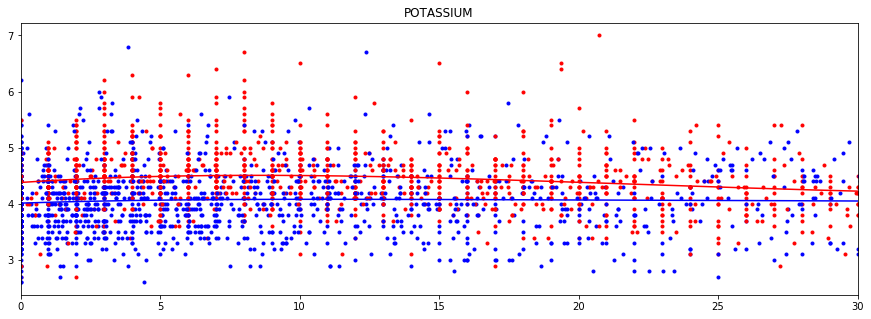

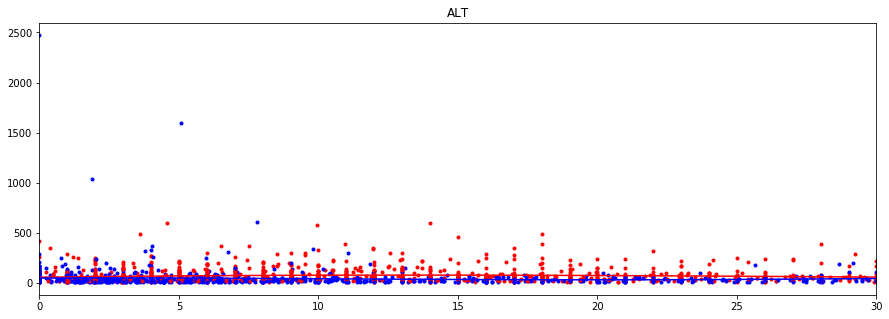

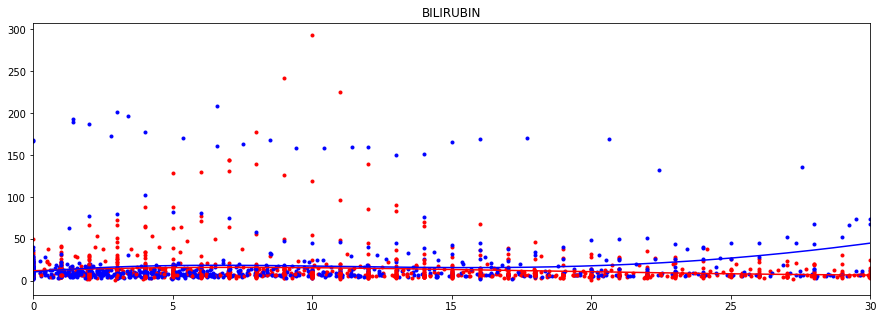

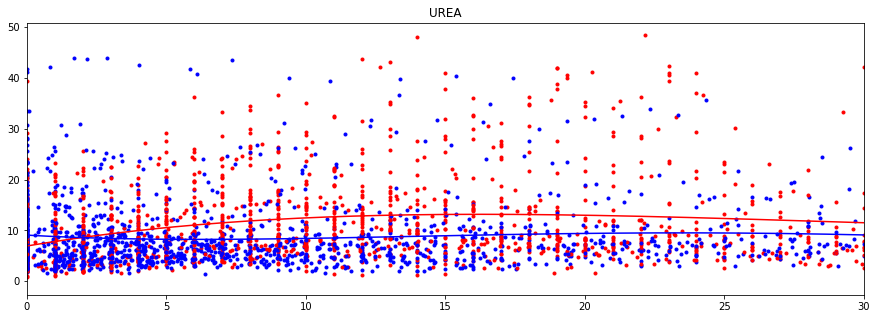

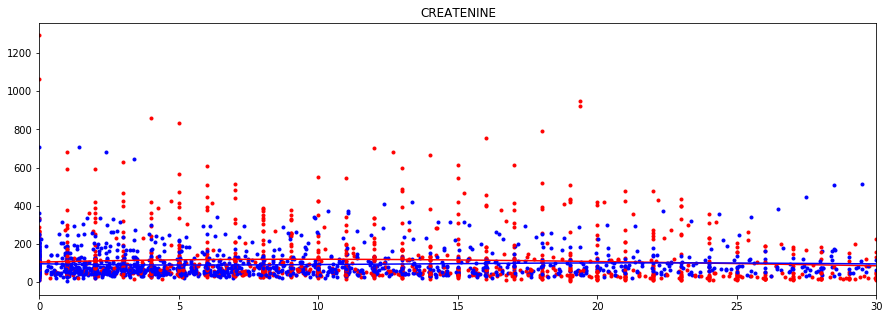

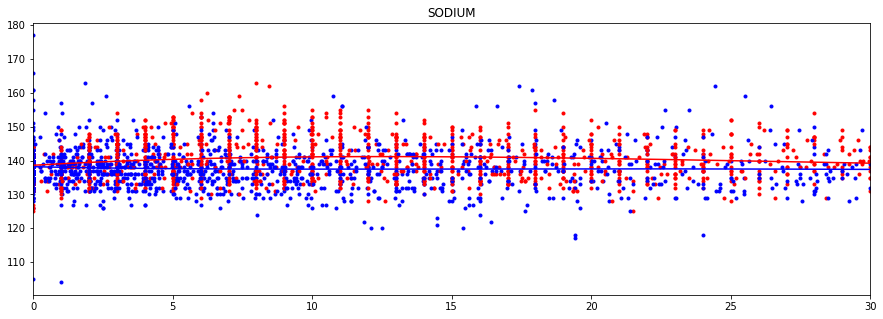

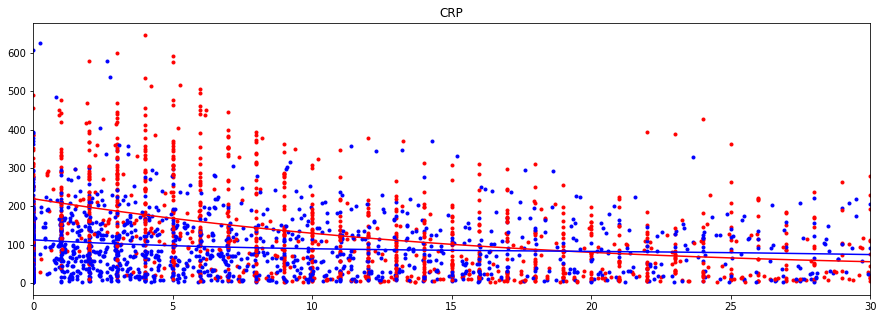

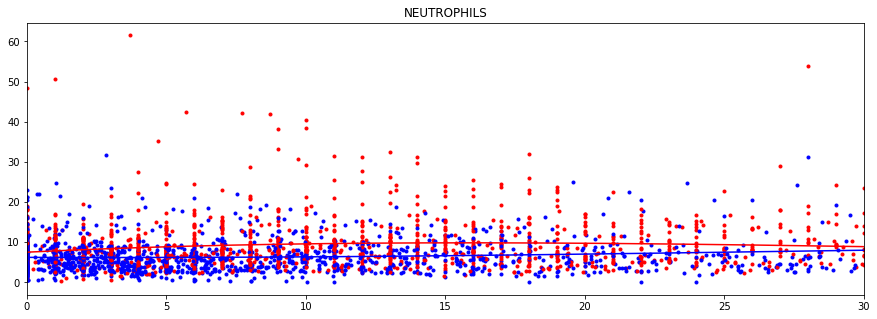

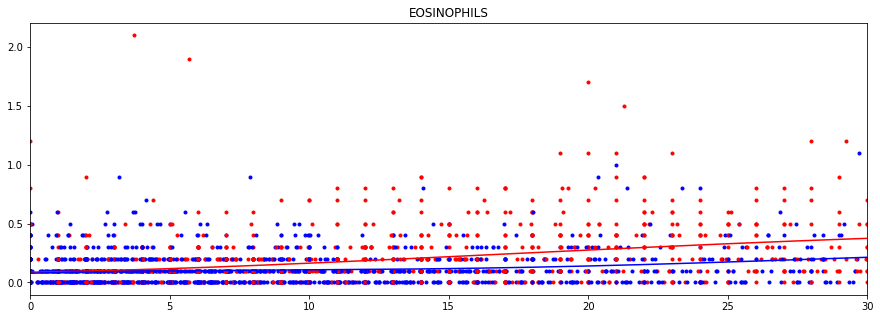

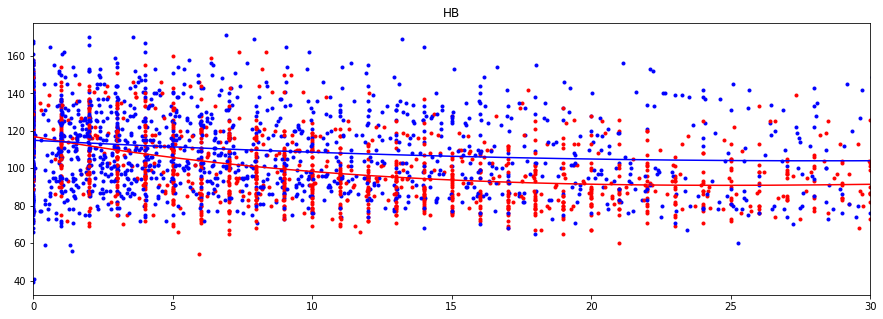

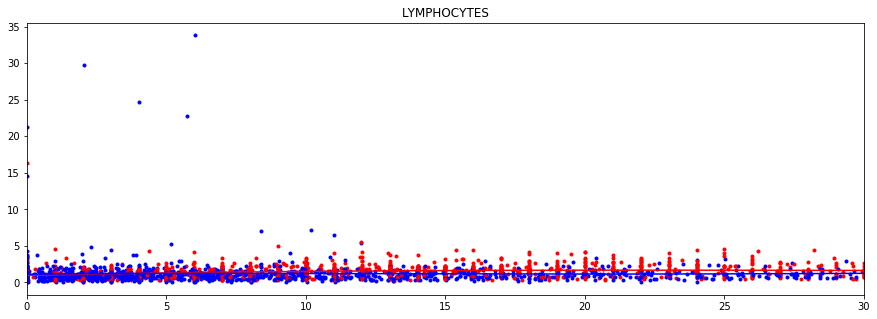

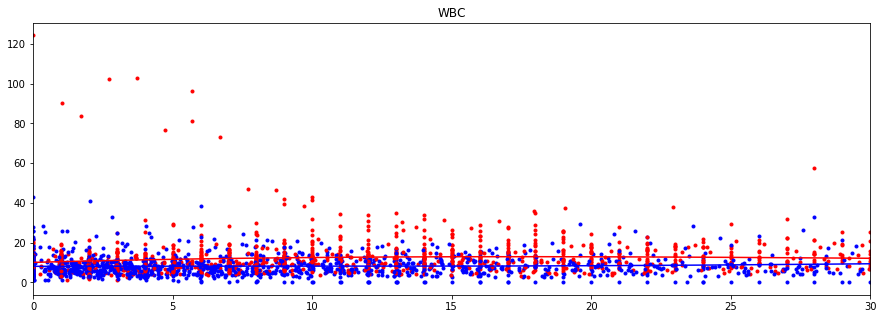

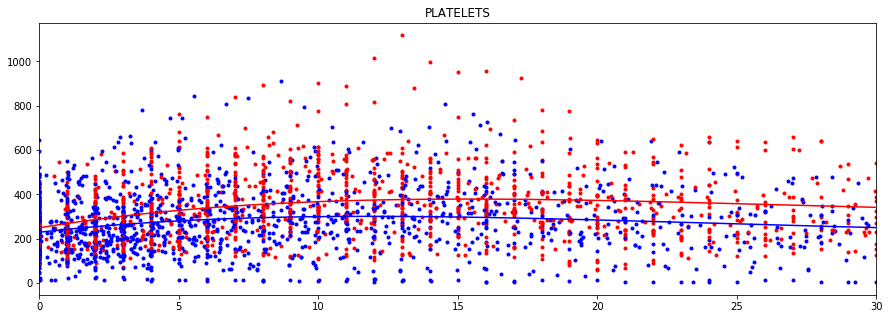

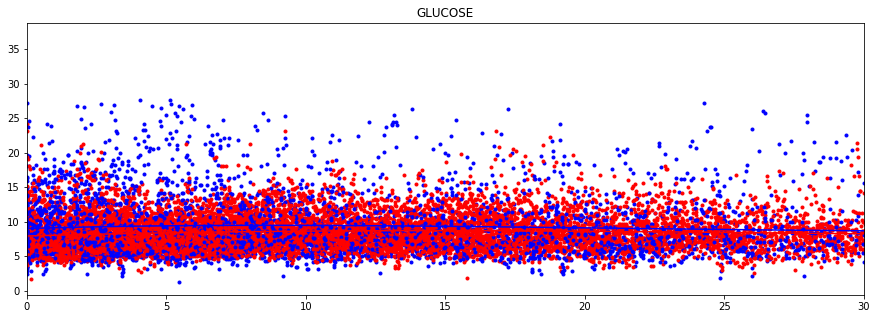

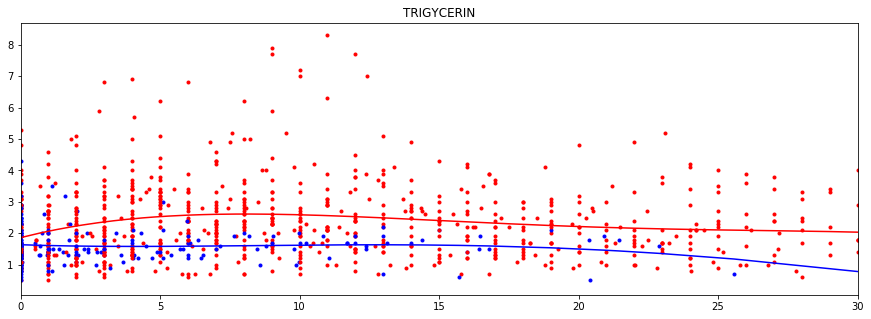

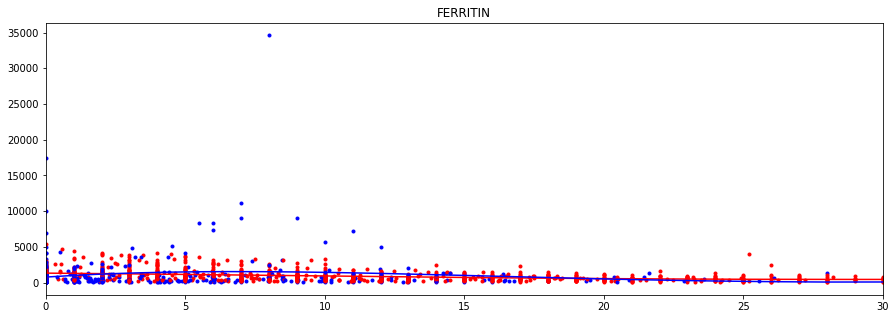

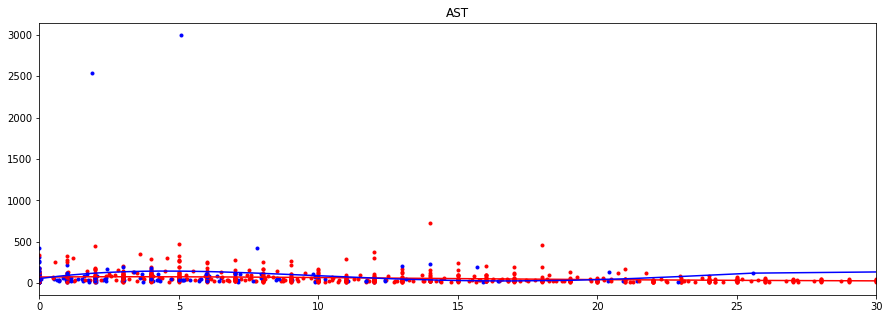

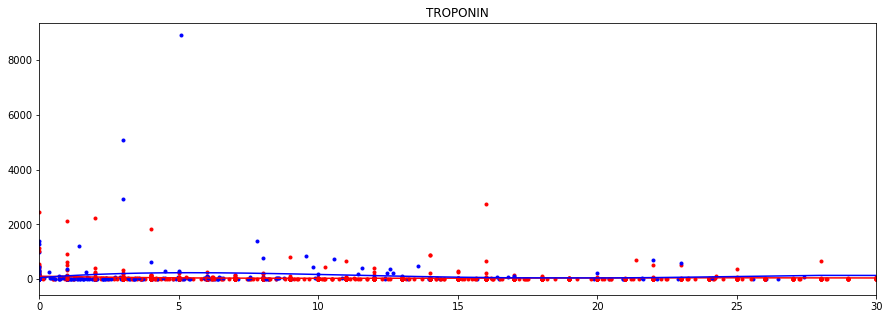

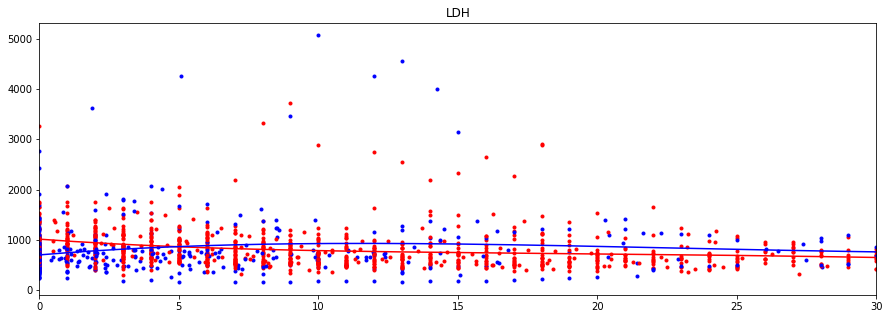

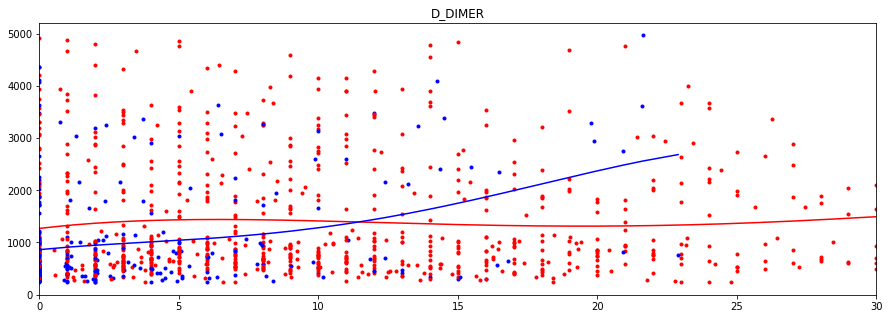

In [25]:
test_codes = list(lab_results_df['REACT_TESTCODE'].unique())
for test_code in test_codes:# = 'POTASSIUM'

    fig, ax = plt.subplots(figsize=(15,5))

    time_icu = np.array([])
    values_icu = np.array([])

    time_noicu = np.array([])
    values_noicu = np.array([])


    for patient in data.keys():

        try:
            #print(patient, '____\n', data[patient][test_code][0])

            time = data[patient][test_code][0]
            values = data[patient][test_code][1]

            icu_true = data[patient]['ITU']

            if icu_true==1:
                ax.plot(time, values,  '.r', linewidth =4, alpha = 1)
                time_icu = np.hstack((time_icu, time))
                values_icu = np.hstack((values_icu, values))
            else:
                ax.plot(time, values, '.b', linewidth =4, alpha = 1)
                time_noicu = np.hstack((time_noicu, time))
                values_noicu = np.hstack((values_noicu, values))

        except:
            pass
    ax.set_xlim([0, 30])
    ax.set_title(test_code);
    
    icu =  pd.DataFrame()
    icu['time'] = time_icu
    icu['values'] = values_icu
    icu = icu.sort_values(by = 'time').reset_index(drop=True)
    coefs = np.polyfit(icu['time'], icu['values'] , 4)
    p = np.poly1d(coefs)
    #plt.plot(icu['time'], icu['values'], "bo", markersize= 2)
    plt.plot(icu['time'], p(icu['time']), "r-")
    #plt.title(test_code + 'ICU')

    noicu =  pd.DataFrame()
    noicu['time'] = time_noicu
    noicu['values'] = values_noicu
    noicu = noicu.sort_values(by = 'time').reset_index(drop=True)
    coefs = np.polyfit(noicu['time'], noicu['values'] , 4)
    p = np.poly1d(coefs)
    #plt.plot(icu['time'], icu['values'], "bo", markersize= 2)
    plt.plot(noicu['time'], p(noicu['time']), "b-")

In [26]:
icu =  pd.DataFrame()
icu['time'] = time_icu
icu['values'] = values_icu
icu = icu.sort_values(by = 'time').reset_index(drop=True)

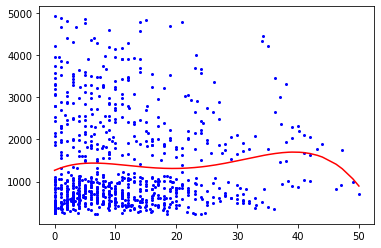

In [27]:
coefs = np.polyfit(icu['time'], icu['values'] , 4)
p = np.poly1d(coefs)
plt.plot(icu['time'], icu['values'], "bo", markersize= 2)
plt.plot(icu['time'], p(icu['time']), "r-")

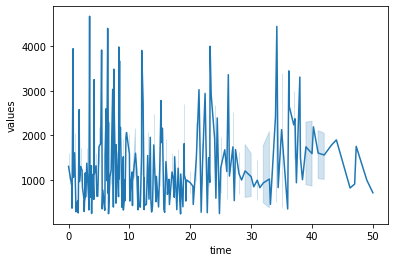

In [28]:
sns.lineplot(x="time", y="values",
             #style="event",
             data=icu)

In [29]:
df.to_csv(r'C:\Users\d07321ow\Google Drive\Cytokine\COVID19\REACT_data_processed\df_01.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\d07321ow\\Google Drive\\Cytokine\\COVID19\\REACT_data_processed\\df_01.csv'